In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


         Passengers
Month              
1949-01       112.0
1949-02       118.0
1949-03       132.0
1949-04       129.0
1949-05       121.0


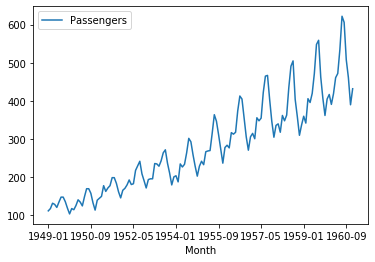

In [2]:
df = pd.read_csv('international-airline-passengers.csv', index_col='Month')
print(df.head())
df.plot()

### Data cleansing

In [3]:
columns_to_keep = ['Passengers']
df = df[columns_to_keep]
df['Passengers'] = df['Passengers'].apply(lambda x: x*1000)
df.index.names = ['Month']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 146


,Passengers
Month,
1949-01,112000.0
1949-02,118000.0
1949-03,132000.0
1949-04,129000.0
1949-05,121000.0


In [4]:
df.describe()

,Passengers
count,144.000000
mean,280298.611111
std,119966.316943
min,104000.000000
25%,180000.000000
50%,265500.000000
75%,360500.000000
max,622000.000000


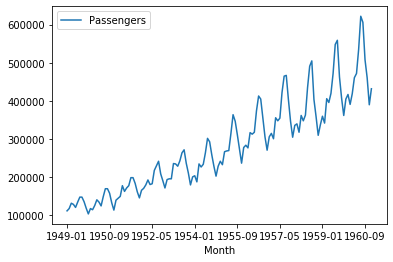

In [5]:
df.plot()

In [6]:
df.isnull().sum()

Passengers    2
dtype: int64

In [7]:
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6628268C8>]],
      dtype=object)

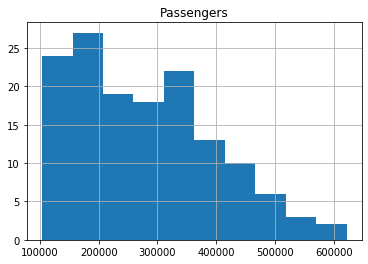

In [8]:
df.hist(bins=10)

In [9]:
len(df[df['Passengers'] == 0])

0

In [10]:
dataset = df.astype('float32')

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

In [12]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [13]:
print(scaled[:10])

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]


In [14]:
# Creating the Rnn 
from sklearn.model_selection import train_test_split

In [15]:
Train, Test = train_test_split(scaled, test_size=0.3)

In [16]:
print('Train',len(Train),'Test', len(Test))

Train 100 Test 44


In [17]:
type(Train)

numpy.ndarray

In [18]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
look_back = 1
X_train, y_train = create_dataset(Train, look_back)
X_test, y_test = create_dataset(Test, look_back)

100 1
0
X 0 to 1
[0.38803086]
Y 1
0.4131274
1
X 1 to 2
[0.4131274]
Y 2
0.3359073
2
X 2 to 3
[0.3359073]
Y 3
0.24131274
3
X 3 to 4
[0.24131274]
Y 4
0.059845567
4
X 4 to 5
[0.05984557]
Y 5
0.34749034
5
X 5 to 6
[0.34749034]
Y 6
0.18339768
6
X 6 to 7
[0.18339768]
Y 7
0.25675675
7
X 7 to 8
[0.25675675]
Y 8
0.24324325
8
X 8 to 9
[0.24324325]
Y 9
0.19305018
9
X 9 to 10
[0.19305018]
Y 10
0.02895753
10
X 10 to 11
[0.02895753]
Y 11
0.45559844
11
X 11 to 12
[0.45559844]
Y 12
0.26833975
12
X 12 to 13
[0.26833975]
Y 13
0.042471036
13
X 13 to 14
[0.04247104]
Y 14
0.41119692
14
X 14 to 15
[0.41119692]
Y 15
0.5637065
15
X 15 to 16
[0.5637065]
Y 16
0.07142857
16
X 16 to 17
[0.07142857]
Y 17
0.17760617
17
X 17 to 18
[0.17760617]
Y 18
0.61003864
18
X 18 to 19
[0.61003864]
Y 19
0.15444013
19
X 19 to 20
[0.15444013]
Y 20
0.44980696
20
X 20 to 21
[0.44980696]
Y 21
0.3281853
21
X 21 to 22
[0.3281853]
Y 22
0.05405405
22
X 22 to 23
[0.05405405]
Y 23
0.5965251
23
X 23 to 24
[0.5965251]
Y 24
0.46911195
24
X 24 

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(98, 1, 1)
(42, 1, 1)


In [21]:
import tensorflow as tf

In [22]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=500, batch_size=batch_size, shuffle=True)

Epoch 1/500
98/98 [==============================] - 1s 6ms/step - loss: 0.1121
Epoch 2/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 3/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 4/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 5/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 6/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 8/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 9/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 10/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 11/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 12/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 13/500
98/98 [=================

98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 103/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 104/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 105/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 106/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 107/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 108/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 109/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 110/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 111/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 112/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 113/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 114/500
98/98 [=========

98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 202/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 203/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 204/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 205/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 206/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 207/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 208/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 209/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 210/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 211/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 212/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 213/500
98/98 [=========

98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 302/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 303/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 304/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 305/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 306/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 307/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 308/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 309/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 310/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 311/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 312/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 313/500
98/98 [=========

98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 401/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 402/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 403/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 404/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 405/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 406/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 407/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 408/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 409/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 410/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 411/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 412/500
98/98 [=========

98/98 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 500/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0548


In [23]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 120722.93 RMSE
Test Score: 121850.15 RMSE


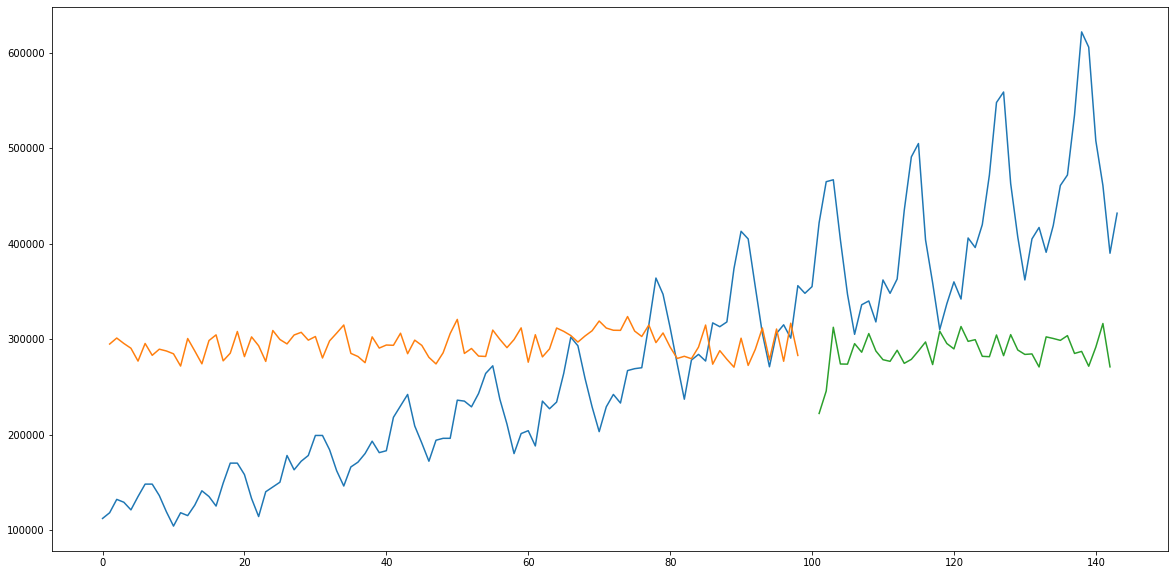

In [24]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()